<a href="https://colab.research.google.com/github/amitagar1/EVA2.0/blob/master/EVA2_Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils


Using TensorFlow backend.


In [0]:
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Concatenate
from keras.optimizers import Adam
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Reshape, Activation, Conv2D, SeparableConv2D, Input, MaxPooling2D, BatchNormalization, Flatten, Dense, Lambda
from keras.layers.merge import concatenate

In [0]:
from keras.datasets import cifar10

(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

num_train, img_rows, img_cols,img_channels =  train_features.shape

num_test, _, _, _ =  test_features.shape

num_classes = len(np.unique(train_labels))

In [52]:
train_features.shape

(50000, 32, 32, 3)

In [60]:
img_channels

3

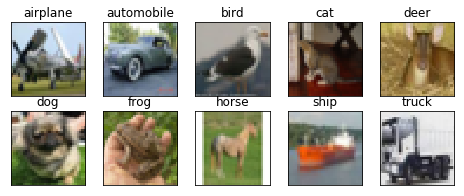

In [53]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)



In [68]:
input

<tf.Tensor 'input_23:0' shape=(?, 32, 32, 3) dtype=float32>

In [0]:
def space_to_depth_x2(x):
    return tf.space_to_depth(x, block_size=2)

In [0]:

input = Input(shape=(img_rows, img_cols, img_channels))

# BLock1

b1_sep1 = SeparableConv2D(filters = 256, kernel_size=(5,5), 
            padding = 'same', strides = (1,1),  depth_multiplier = 10, 
            use_bias='False', name='b1_sep1')(input)

b1_con1 = Conv2D(24, (5,5), strides=(1,1), padding='same',activation='relu', name='b1_conv1', use_bias=False)(b1_sep1)

b1_con2 = Conv2D(64, (5,5), strides=(1,1), padding='same',activation='relu', name='b1_conv2', use_bias=False)(b1_con1)

b1_sep2 = SeparableConv2D(128, kernel_size=(5, 5), 
            padding = 'same', strides = (1,1), 
                          depth_multiplier = 1, use_bias='False', name='b1_sep2')(b1_con2)

b1_max1 = MaxPooling2D(pool_size=(2, 2))(b1_sep2)


# BLock2

b2_sep1 = SeparableConv2D(256, kernel_size=(3,3), 
            padding = 'same', strides = (1,1),  depth_multiplier = 1, 
             use_bias='False', name='b2_sep1')(b1_max1)

b2_con1 = Conv2D(64, (3,3), strides=(1,1), padding='same', activation='relu', name='b2_conv1', use_bias=False)(b2_sep1)


b2_sep2 = SeparableConv2D(256, kernel_size=(3,3), 
            padding = 'same', strides = (1,1),  depth_multiplier = 1, 
             use_bias='False', name='b2_sep2')(b2_con1)


b2_sep3 = SeparableConv2D(256, kernel_size=(3, 3), 
            padding = 'same', strides = (1,1),  
                          depth_multiplier = 1, use_bias='False', name='b2_sep3')(b2_sep2)

b2_max1 = MaxPooling2D(pool_size=(2, 2))(b2_sep3)


# BLock3


b3_con1 = Conv2D(64, (3,3), strides=(1,1), padding='same', activation='relu', name='b3_conv1', use_bias=False)(b2_max1)


b3_sep1 = SeparableConv2D(64, kernel_size=(3,3), 
            padding = 'same', strides = (1,1),  depth_multiplier = 1, 
            use_bias='False', name='b3_sep1')(b3_con1)

b3_con2 = Conv2D(256, (3,3), strides=(1,1), padding='same', activation='relu', name='b3_conv2', use_bias=False)(b3_sep1)


b3_sep2 = SeparableConv2D(128, kernel_size=(3,3), 
            padding = 'same', strides = (1,1),  
                          depth_multiplier = 1, use_bias='False', name='b3_sep2')(b3_con2)

Fl_1  = Flatten()(b3_sep2)

output = Dense(10, activation='softmax')(Fl_1)

In [86]:
model = Model(inputs=[input], outputs=[output])
model.summary()


Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
b1_sep1 (SeparableConv2D)    (None, 32, 32, 256)       8686      
_________________________________________________________________
b1_conv1 (Conv2D)            (None, 32, 32, 24)        153600    
_________________________________________________________________
b1_conv2 (Conv2D)            (None, 32, 32, 64)        38400     
_________________________________________________________________
b1_sep2 (SeparableConv2D)    (None, 32, 32, 128)       9920      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
b2_sep1 (SeparableConv2D)    (None, 16, 16, 256)       341

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [88]:
model.fit(train_features, train_labels,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(test_features, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 83s 2ms/step - loss: 2.3036 - acc: 0.1004 - val_loss: 2.3031 - val_acc: 0.1000
Epoch 2/10
50000/50000 [==============================] - 78s 2ms/step - loss: 2.3034 - acc: 0.0990 - val_loss: 2.3030 - val_acc: 0.1000
Epoch 3/10
50000/50000 [==============================] - 77s 2ms/step - loss: 2.3036 - acc: 0.1003 - val_loss: 2.3029 - val_acc: 0.1000
Epoch 4/10
50000/50000 [==============================] - 77s 2ms/step - loss: 2.3037 - acc: 0.0983 - val_loss: 2.3030 - val_acc: 0.1000
Epoch 5/10
50000/50000 [==============================] - 77s 2ms/step - loss: 2.3037 - acc: 0.1004 - val_loss: 2.3048 - val_acc: 0.1000
Epoch 6/10
50000/50000 [==============================] - 77s 2ms/step - loss: 2.3033 - acc: 0.1019 - val_loss: 2.3029 - val_acc: 0.1000
Epoch 7/10
50000/50000 [==============================] - 77s 2ms/step - loss: 2.3036 - acc: 0.1002 - val_loss: 2.3030 - val_acc